# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Anac\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


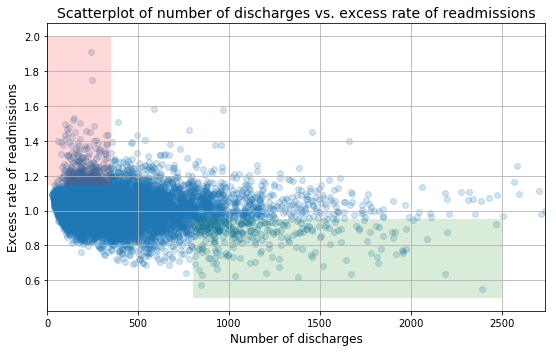

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****

### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [ ]:
# Your turn

A. Do you agree with the above analysis and recommendations? Why or why not?

** Response: ** 
The crux of the above analysis is that the size of the hospitals indicated by the number of discharges is negatively corelated to the excess readmission rates, i.e. as the size of the hospitals increase, the excess readmission rates decrease. 


As a first step, I would check the correlation between these two variables to confirm that these two are related. We can use the Pearson correlation coefficient and Spearman rank-order correlation coefficient measure to confirm that these two are related.


Even if it is proven that the size of hospital can be reliably given by the number of discharges and the correlation between these two factors are confirmed, i would not agree with the above analysis. There could be other factors that affect the readmission rates and the hospital size as a factor may not be the direct reason. For example, the smaller hospitals may be located in rural areas with limited infrastructure or the patients may not have necessary support to continue post-discharge care.


In [23]:
# remove the null values
clean_hospital_read_df = clean_hospital_read_df[ (clean_hospital_read_df['Number of Discharges'].notnull()) & 
                                                (clean_hospital_read_df['Excess Readmission Ratio'].notnull())]

In [17]:
import seaborn as sns
import scipy.stats

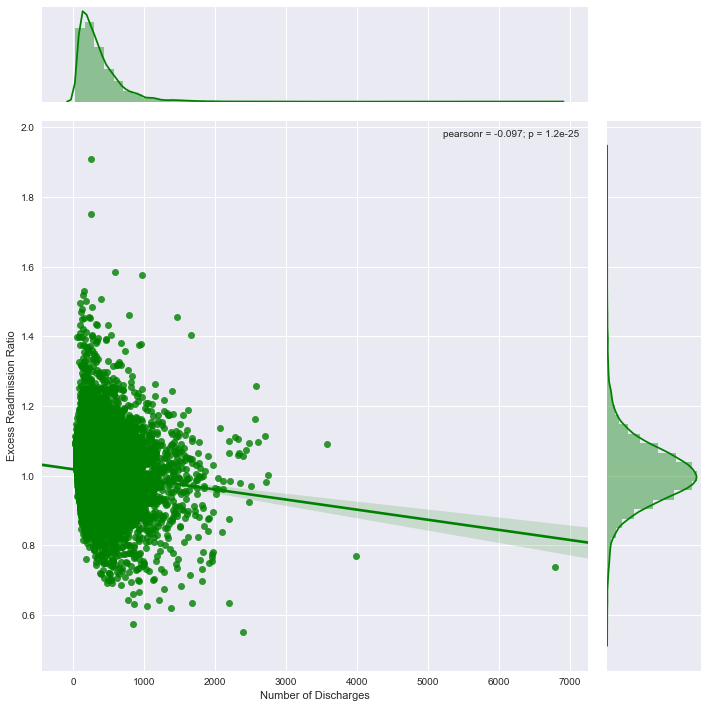

In [22]:
sns.jointplot(clean_hospital_read_df['Number of Discharges'], clean_hospital_read_df['Excess Readmission Ratio'],  
              kind="reg", size=10, color='g')

In [24]:
scipy.stats.spearmanr(clean_hospital_read_df['Number of Discharges'], clean_hospital_read_df['Excess Readmission Ratio'])

SpearmanrResult(correlation=-0.077129405370727433, pvalue=1.2156459659603624e-16)


   1. Setup an appropriate hypothesis test.

The hypothesis test here will be there is no difference in the readmission rates between small hospitals and large hospitals.

$H$<sub>o</sub> : $Xbar$<sub>small hosp readm rate</sub> = $Xbar$<sub>large hosp readm rate</sub> 

$H$<sub>a</sub> : $Xbar$<sub>small hosp readm rate</sub> &ne; $Xbar$<sub>large hosp readm rate</sub>

Look at the distribution of hospital size (number of discharges)

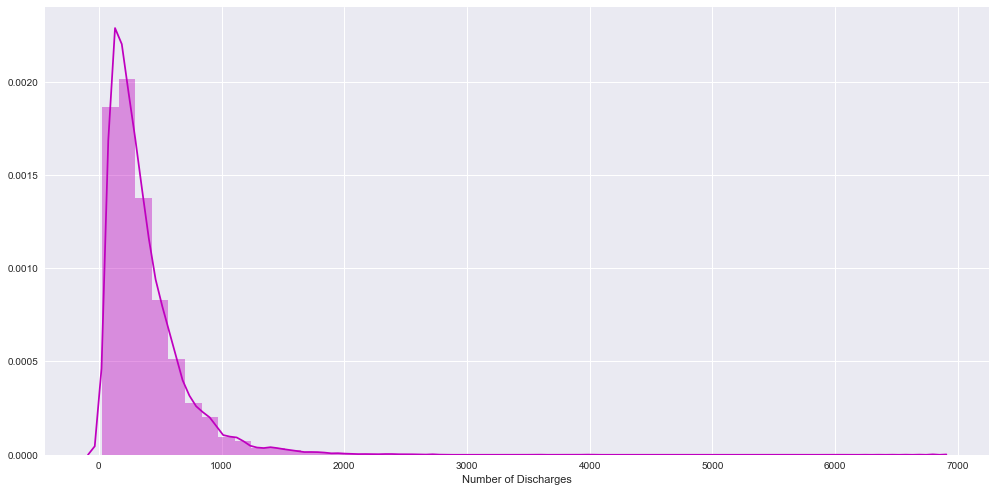

In [31]:
f, axes = plt.subplots(1, 1, figsize=(14, 7))
# Plot a historgram and kernel density estimate
sns.distplot(clean_hospital_read_df['Number of Discharges'], color="m", ax=axes)

plt.tight_layout()

We will follow the same guidelines given in this exercise regarding size, i.e. small hospitals are the ones that have number of discharges < 100 and large ones are the ones where it is > 1000.

Let us look at the distribution of the hospital size of both these groups

In [41]:
small_hosp_df = clean_hospital_read_df[(clean_hospital_read_df['Number of Discharges']<100)].copy()
large_hosp_df = clean_hospital_read_df[(clean_hospital_read_df['Number of Discharges']>1000)].copy()

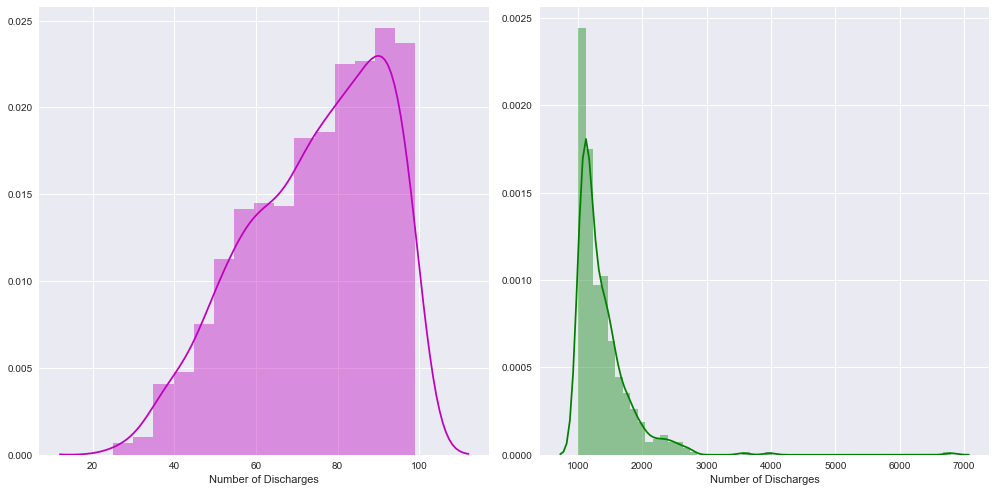

In [45]:
f, axes = plt.subplots(1, 2, figsize=(14, 7))
# Plot a historgram and kernel density estimate
sns.distplot(small_hosp_df['Number of Discharges'],color="m", ax=axes[0])
sns.distplot(large_hosp_df['Number of Discharges'],color="g", ax=axes[1])

plt.tight_layout()

Let us look at the distribution of the hospital size of both these groups

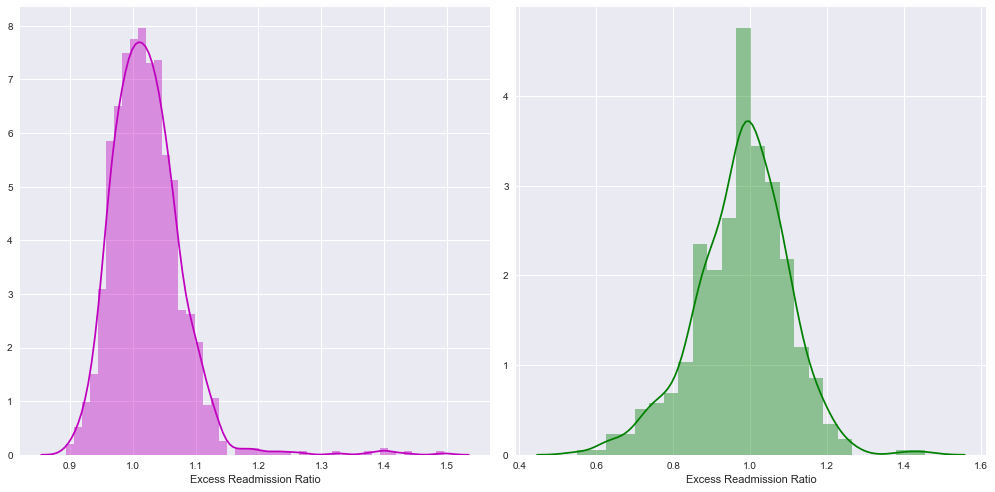

In [48]:
f, axes = plt.subplots(1, 2, figsize=(14, 7))
# Plot a historgram and kernel density estimate
sns.distplot(small_hosp_df['Excess Readmission Ratio'],color="m", ax=axes[0])
sns.distplot(large_hosp_df['Excess Readmission Ratio'],color="g", ax=axes[1])

plt.tight_layout()

In [50]:
#mean of both samples and their difference 
sm_hosp_mean = small_hosp_df['Excess Readmission Ratio'].mean()
lg_hosp_mean = large_hosp_df['Excess Readmission Ratio'].mean()
sm_hosp_mean,lg_hosp_mean,sm_hosp_mean-lg_hosp_mean

(1.0226183501683506, 0.9783354211663071, 0.04428292900204345)

We will use a two sample $z$ test
* $n$ > 30
* $\mu$ and $\sigma$ of the population is known

$\alpha$ is 0.01, the corresponding $z$ value is -2.3263

In [55]:
#size of each group
n_sm_hosp=len(small_hosp_df)
n_lg_hosp=len(large_hosp_df)

In [56]:
# std dev of each group
sm_hosp_sig = small_hosp_df['Excess Readmission Ratio'].std()
lg_hosp_sig = large_hosp_df['Excess Readmission Ratio'].std()
sm_hosp_sig,lg_hosp_sig

(0.05797860323426279, 0.12000735348224047)

In [60]:
#calc the z
z_val=(sm_hosp_mean-lg_hosp_mean) / (np.sqrt((sm_hosp_sig*sm_hosp_sig/n_sm_hosp)+
                                             (lg_hosp_sig*lg_hosp_sig/n_lg_hosp)))
z_val

7.6017424185004856

<div class="span5 alert alert-success">



<ol>
<li> ** Compute and report the observed significance value (or p-value).** <br>

In this case, the $Z$ value is 7.601 and the p-value of this is close to 0 
<br>
<br>
<li> ** Report statistical significance for α = .01. ** <br>

Aplha value of 0.01 means that, there is less than one in one hundred chance that a difference in observed performance between the small and large hospitals would come about due to chance alone.
<br>
<br>
<li> ** Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?** <br>

As explained in the previous answer, statistical significance means that the observed difference is likely not to have occured due to chance and there is some reason behind the difference. It has been found that statistical difference is observed even with very small difference when the data is large.

Practical significance is when the difference observed makes any practical difference in the real world. 

In this case, there is roughly 4% difference in the excess readmission rates between small and large hospitals. From what i read on <a href=https://www.cms.gov/Medicare/Medicare-Fee-for-Service-Payment/AcuteInpatientPPS/Readmissions-Reduction-Program.html> CMS.gov</a> site, looks like this 4% is practically significant.

<br>
<br>
<li> ** Look at the scatterplot above** <br>
<ul>
<li>What are the advantages and disadvantages of using this plot to convey information?
<li>Construct another plot that conveys the same information in a more direct manner.
</ul>
<br>
Regarding the scatterplot shown, a box plot as shown below will be more effective in explaining that there are more large hospitals that have an excess readmission rate of less than 1.0. The scatterplot does not clearly show the volume or size of the data, especially, when there are data points occuring in the same location

</ol>

</div>

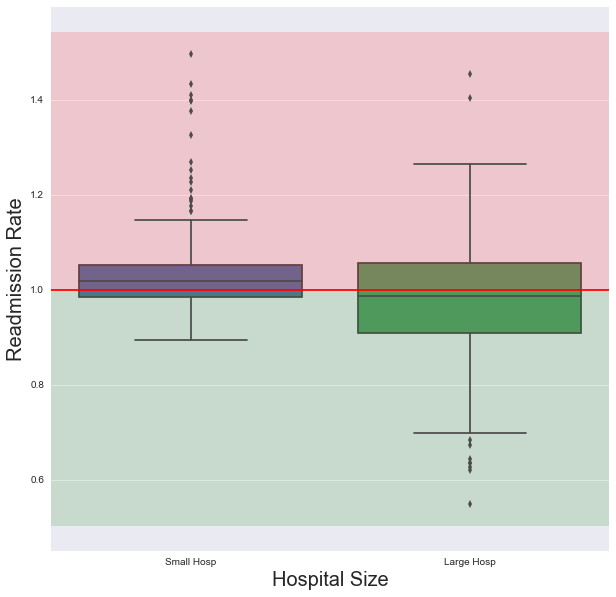

In [103]:
f, ax = plt.subplots(figsize=(10,10))
sns.boxplot(data=[small_hosp_df['Excess Readmission Ratio'],large_hosp_df['Excess Readmission Ratio']])
xmin,xmax=ax.get_xlim()
ymin,ymax=ax.get_ylim()
labels=['Small Hosp','Large Hosp']
plt.hlines(y=1.0,xmin=xmin,xmax=xmax,color='r')
ax.set_xlabel('Hospital Size',fontsize=20)
ax.set_ylabel('Readmission Rate',fontsize=20)
ax.set_xticklabels(labels)
ax.fill_between([xmin,xmax], 1,ymax, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([xmin,xmax], ymin, 1, facecolor='green', alpha = .15, interpolate=True)
plt.show()